# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

•	The gender of the mice in the study was nearly identical between male and female (51% vs 49% respectively). Future studies should explore potential correlation between gender and drug efficacy.
•	Both Capomulin and Ramicane appear to be equally effective. Further analysis to compare percent of change (between starting and ending tumor volume) by drug regimen would provide a more in-depth study of the effectiveness of each. 
•	In the data comparing tumor volume by drug regimen, Infubinol has one outlier, the others all have data points within the expected upper and lower bounds.
•	The tumor volume over time for Mouse i738 will using Capomulin shows a steady decrease from start through timepoint 25, but begins to increase from timepoints 25-40. Further variables should be reviewed to determine influence on drug efficiacy. 
•	The correlation factor between mouse weight and tumor volume shows a strong positive correlation of 0.84. Based on this correlation, mouse weight should be one of the variable included in analysis of other factors because it could skew the results.

In [360]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results,on="Mouse ID",how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [361]:
# Checking the number of mice.
number_of_mice=len(mouse_metadata["Mouse ID"])
number_of_mice

249

In [362]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [363]:
# Optional: Get all the data for the duplicate mouse ID. 
all_rows_dup_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
all_rows_dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [364]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [365]:
# Checking the number of mice in the clean DataFrame.

mice = clean_combined_data["Mouse ID"].unique()
len(mice)

248

## Summary Statistics

In [366]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_volume_stats = clean_combined_data[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_df = tumor_volume_stats.groupby(["Drug Regimen"]).mean()
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Volume"})
tumor_df['Std. Dev. Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).std()
tumor_df['Median Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).median()
tumor_df['Variance Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).var()
tumor_df['SEM Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).sem()

tumor_df["Mean Volume"] = tumor_df["Mean Volume"].map("{:,.2f}".format)
tumor_df["Std. Dev. Volume"] = tumor_df["Std. Dev. Volume"].map("{:,.2f}".format)
tumor_df["Median Volume"] = tumor_df["Median Volume"].map("{:,.2f}".format)
tumor_df["Variance Volume"] = tumor_df["Variance Volume"].map("{:,.2f}".format)
tumor_df["SEM Volume"] = tumor_df["SEM Volume"].map("{:,.2f}".format)

tumor_df

,Mean Volume,Std. Dev. Volume,Median Volume,Variance Volume,SEM Volume
Drug Regimen,,,,,
Capomulin,40.68,4.99,41.56,24.95,0.33
Ceftamin,52.59,6.27,51.78,39.29,0.47
Infubinol,52.88,6.57,51.82,43.13,0.49
Ketapril,55.24,8.28,53.70,68.55,0.60
Naftisol,54.33,8.13,52.51,66.17,0.60
Placebo,54.03,7.82,52.29,61.17,0.58
Propriva,52.32,6.62,50.45,43.85,0.54
Ramicane,40.22,4.85,40.67,23.49,0.32
Stelasyn,54.23,7.71,52.43,59.45,0.57


In [367]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

regimen_stats= clean_combined_data.groupby("Drug Regimen")

tumor_by_regimen = regimen_stats["Tumor Volume (mm3)"].agg(["mean", "std", "median", "var"])

tumor_by_regimen["mean"] = tumor_by_regimen["mean"].map("{:,.2f}".format)
tumor_by_regimen["median"] = tumor_by_regimen["median"].map("{:,.2f}".format)
tumor_by_regimen["var"] = tumor_by_regimen["var"].map("{:,.2f}".format)
tumor_by_regimen["std"] = tumor_by_regimen["std"].map("{:,.2f}".format)

#tumor_by_regimen.rename(columns={"mean": "Mean Volume", "median": "Median", "var": "Variance", 
#                                "std": "Standard Devation"})

tumor_by_regimen_renamed = tumor_by_regimen.rename(columns={"mean": "Mean", "std": "StdDev", 
                                                            "median": "Median", "var": "Variance"})

tumor_by_regimen_renamed

,Mean,StdDev,Median,Variance
Drug Regimen,,,,
Capomulin,40.68,4.99,41.56,24.95
Ceftamin,52.59,6.27,51.78,39.29
Infubinol,52.88,6.57,51.82,43.13
Ketapril,55.24,8.28,53.70,68.55
Naftisol,54.33,8.13,52.51,66.17
Placebo,54.03,7.82,52.29,61.17
Propriva,52.32,6.62,50.45,43.85
Ramicane,40.22,4.85,40.67,23.49
Stelasyn,54.23,7.71,52.43,59.45


## Bar and Pie Charts

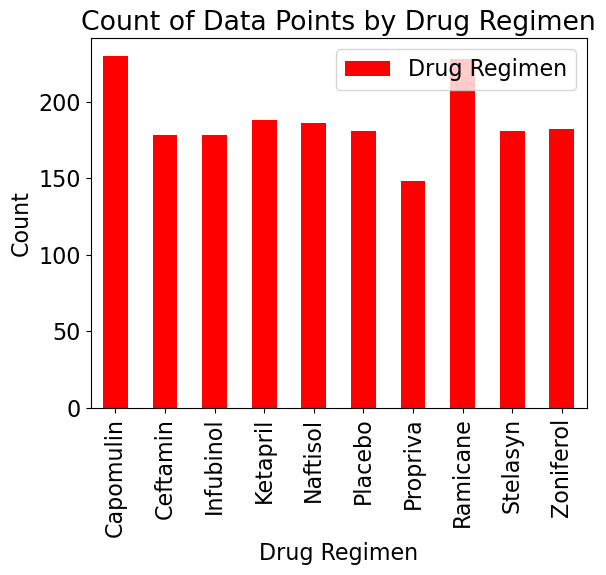

In [368]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_group = clean_combined_data.groupby("Drug Regimen")
#c = pd.DataFrame(drug_group["Drug Regimen"].count())

count_chart = drug_group_count.plot(kind="bar", title="Count of Data Points by Drug Regimen", color="red")

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")


plt.show()


Text(0.5, 1.0, 'Count of Data Points by Drug Regimen')

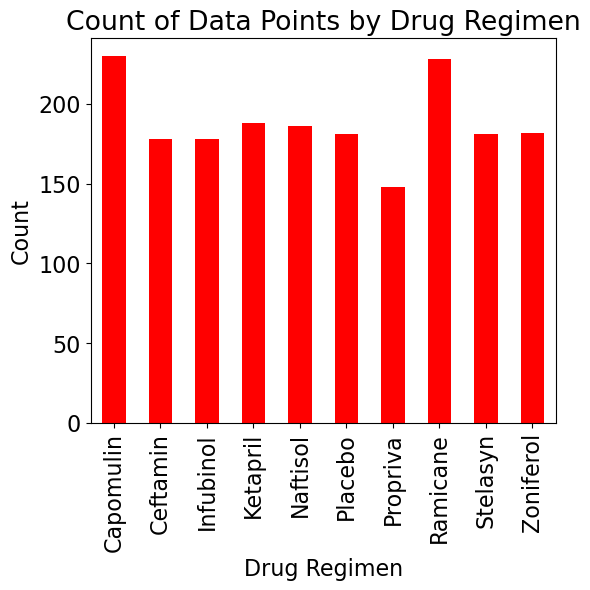

In [369]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints = clean_combined_data.groupby(["Drug Regimen"])["Timepoint"].count()
x = timepoints.index.get_level_values(0)
y = np.array(timepoints)
#print(y)

count_chart2=timepoints.plot(kind="bar", figsize=(6,5), color="red")
count_chart2.set_xlabel("Drug Regimen")
count_chart2.set_ylabel("Count")
count_chart2.set_title("Count of Data Points by Drug Regimen")




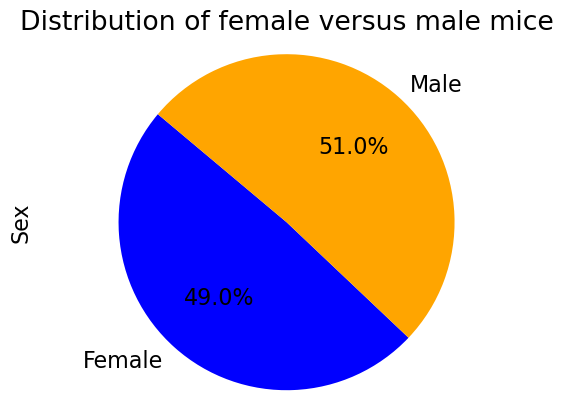

In [370]:
gender_group = clean_combined_data.groupby("Sex")
gender_group_count = pd.DataFrame(gender_group["Sex"].count())
#gender_group_count.head()

# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%', fontsize=16, colors =["blue","orange"],legend =False)
plt.axis("equal")
plt.show()


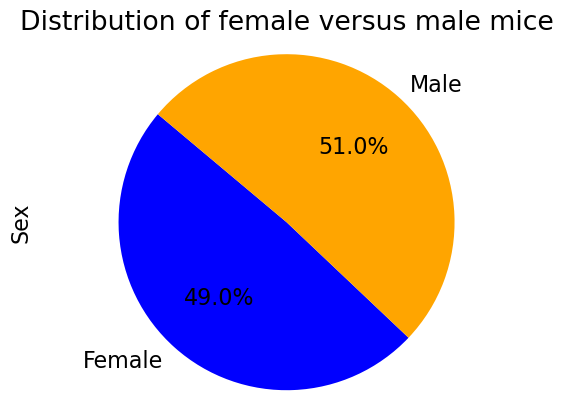

In [371]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#gender_group_count = pd.DataFrame(gender_group["Sex"].count())
genders = list(gender_group_count.index.values)
gender_counts = gender_group_count["Sex"]
colors=["blue","orange"]

plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [372]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_by_mouse_id = clean_combined_data.groupby("Mouse ID")
max_timepoint = group_by_mouse_id["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
#max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_volume = max_timepoint.merge(clean_combined_data, on=["Mouse ID", "Timepoint"], how="left")
max_timepoint_volume



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [373]:

four_last_tumor = max_timepoint_volume.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor



Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Zoniferol    q633               70.828
             s337               62.110
             w140               47.718
             w575               68.401
             x613               48.078

[248 rows x 1 columns]

In [374]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mouse ID,,,,,,,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a262,Last_tumor_size,NaN,NaN,NaN,NaN,NaN,70.718,NaN,NaN,NaN,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a366,Last_tumor_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.441,NaN


In [384]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    median = quartiles[0.5].round(2)
#    skew = round(((upperq-median)-(median-lowerq))//(upperq-lowerq),2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}.")
    print(f"The upper quartile of {drug} is: {upperq}.")
    print(f"The interquartile range of {drug} is: {iqr}.")
    print(f"The the median of {drug} is: {quartiles[0.5]}.")
#    print(f"The datapoints of {drug} have a skew of: {skew}.")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38.
The upper quartile of Capomulin is: 40.16.
The interquartile range of Capomulin is: 7.78.
The the median of Capomulin is: 38.12.
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56.
The upper quartile of Ramicane is: 40.66.
The interquartile range of Ramicane is: 9.1.
The the median of Ramicane is: 36.56.
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05.
The upper quartile of Infubinol is: 65.53.
The interquartile range of Infubinol is: 11.48.
The the median of Infubinol is: 60.16.
Values below 36.83 for Infubinol could be o

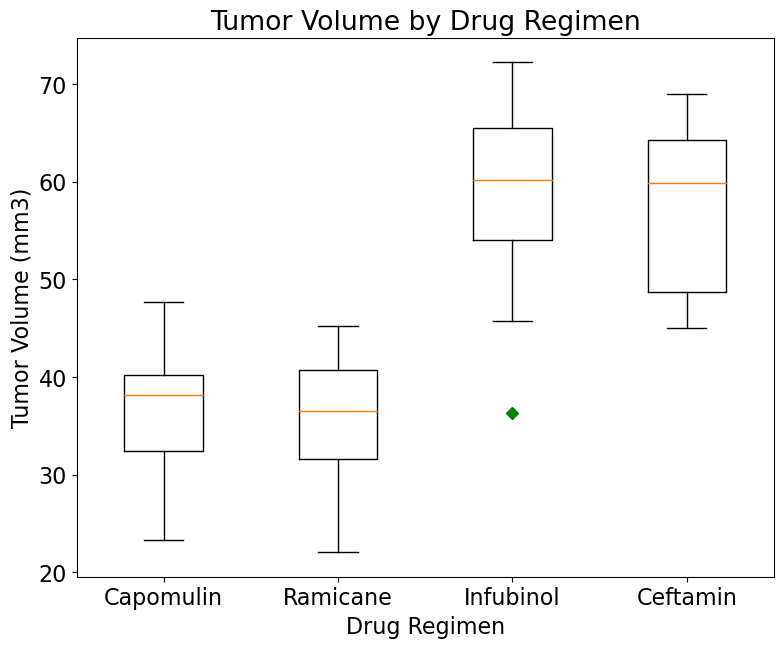

In [385]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots(figsize=(9,7))
x = [1, 2, 3, 4]
ax1.set_title("Tumor Volume by Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_volume, notch=0, sym="gD")
plt.xticks(x,drug_regimens)
plt.show()



## Line and Scatter Plots

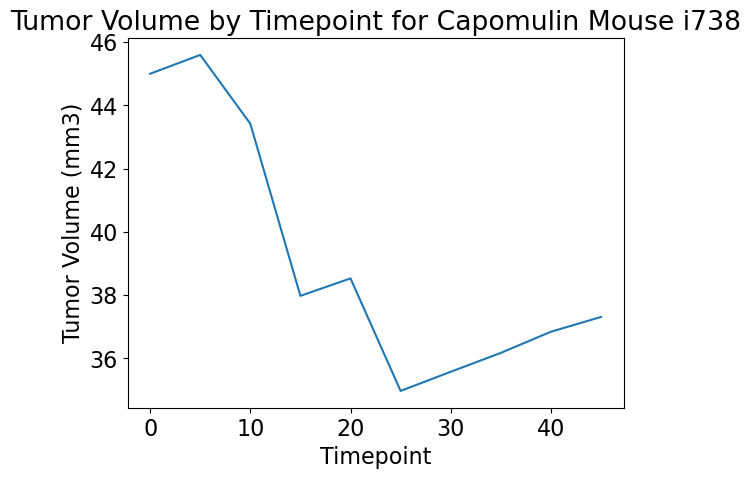

In [386]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_combined_data.loc[clean_combined_data["Mouse ID"] == "i738"]
#capomulin_mouse

capomulin_time = capomulin_mouse["Timepoint"]
capomulin_volume = capomulin_mouse["Tumor Volume (mm3)"]

x_axis = np.arange(0,50,0.5)

plt.plot(capomulin_time, capomulin_volume)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume by Timepoint for Capomulin Mouse i738")

plt.show()


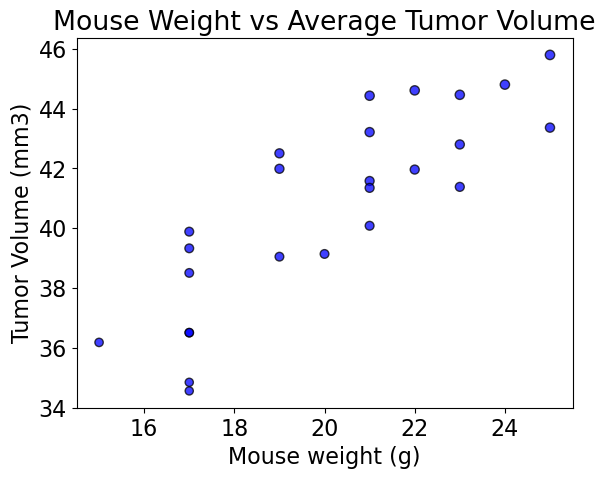

In [387]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
#capomulin_data

stats_by_mouse_id = capomulin_data.groupby(["Mouse ID"]).agg(
    mouse_weight=("Weight (g)", np.mean),
    tumor_vol_mean=("Tumor Volume (mm3)", np.mean)).round(3)

#stats_by_mouse_id

plt.scatter(
    stats_by_mouse_id["mouse_weight"],
    stats_by_mouse_id["tumor_vol_mean"],
    marker="o",
    facecolors="blue",
    edgecolors="black",
    s=stats_by_mouse_id["tumor_vol_mean"],
    alpha=.75)

plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between both factors is 0.84.
The equation of the regression line is: y = 0.95x + 21.55.
The r-squared value is: 0.8419461020261081.


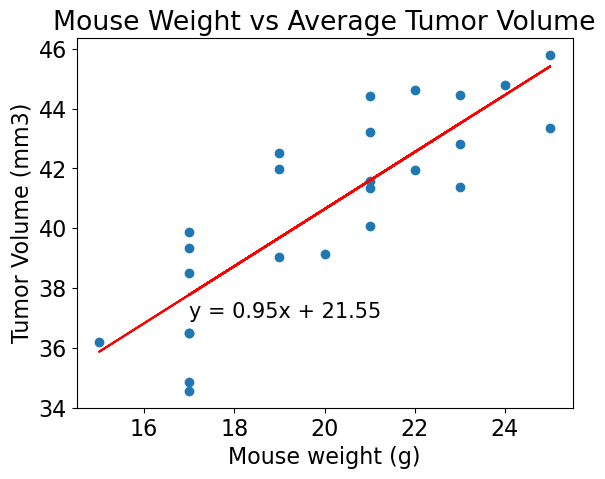

In [388]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(stats_by_mouse_id["mouse_weight"],stats_by_mouse_id["tumor_vol_mean"])

x_values = stats_by_mouse_id["mouse_weight"]
y_values = stats_by_mouse_id["tumor_vol_mean"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

#scatter plot 

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(17,37), fontsize=15, color="black")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f"The correlation between both factors is {round(correlation[0],2)}.")
print(f"The equation of the regression line is: {line_eq}.")
print(f"The r-squared value is: {rvalue}.")

plt.show()





#print(regress_values)




